# AMC's Goal: Know customers better and provide the best theatre experience

In [1]:
from google.colab import files
files.upload()
#upload AMC_Reviews-Trustpilot_influenster_Final

Saving AMC_Reviews-Trustpilot_influenster_Final.xlsx to AMC_Reviews-Trustpilot_influenster_Final (4).xlsx


{'AMC_Reviews-Trustpilot_influenster_Final (4).xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00!\x8cF:s\x01\x00\x00\x8c\x05\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

In [2]:
import pandas as pd

# Path to your uploaded Excel file
file_name = "/content/AMC_Reviews-Trustpilot_influenster_Final.xlsx"

# Load the first sheet (or specify sheet_name if needed)
reviews_df = pd.read_excel(file_name, sheet_name=0)

# Preview columns and first rows
print("Columns in the file:", reviews_df.columns.tolist())
reviews_df['review_text'] = reviews_df['reviews']
reviews_df = reviews_df.drop(columns=['Review type', 'URL'])

reviews_df.head()

Columns in the file: ['rating ', 'Review type', 'reviews', 'URL']


,rating,reviews,review_text
0,5,The Amc in Columbus Ga. Is absolutely the best...,The Amc in Columbus Ga. Is absolutely the best...
1,1,The fact that you don't want to touch NC-17 an...,The fact that you don't want to touch NC-17 an...
2,1,"Amc tyson, the place was filthy, especially th...","Amc tyson, the place was filthy, especially th..."
3,1,I had a brand new gift card that suddenly had ...,I had a brand new gift card that suddenly had ...
4,1,Tricking the customers to buy membership! Woww...,Tricking the customers to buy membership! Woww...


In [64]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')

# Load Excel file (replace with your actual file path)
file_name = "/content/AMC_Reviews-Trustpilot_influenster_Final.xlsx"
reviews_df = pd.read_excel(file_name, sheet_name=0)

# Drop unnecessary columns
reviews_df = reviews_df.drop(columns=['Review type', 'URL'], errors='ignore')


# Create a cleaned review column
def preprocess_text(text):
    text = str(text).lower()
    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if w.isalpha() and w not in stop_words]
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in words]
    return ' '.join(words)

reviews_df['review_text'] = reviews_df['reviews'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [65]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')

# Load your Excel file (replace with your actual path)
file_name = "/content/AMC_Reviews-Trustpilot_influenster_Final.xlsx"
reviews_df = pd.read_excel(file_name, sheet_name=0)

# Step 1: Clean column names (remove spaces, lowercase)
reviews_df.columns = reviews_df.columns.str.strip().str.lower()

# Step 2: Drop unnecessary columns if they exist
reviews_df = reviews_df.drop(columns=['review type', 'url'], errors='ignore')

# Step 3: Ensure we have a cleaned review column
reviews_df['review_text'] = reviews_df['reviews']

# Step 4: Initialize VADER
sid = SentimentIntensityAnalyzer()

# Step 5: Keywords to enforce negative sentiment
negative_keywords = ['tricking', 'hide', 'scam', 'filthy', 'consequences', 'ripoff']

# Step 6: Combined sentiment function
def combined_sentiment(text, rating):
    text_lower = str(text).lower()

    # Step 1: Check negative keywords first
    for word in negative_keywords:
        if word in text_lower:
            return 'negative'

    # Step 2: VADER sentiment
    vader_score = sid.polarity_scores(str(text))['compound']
    if vader_score >= 0.05:
        sentiment = 'positive'
    elif vader_score <= -0.05:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'

    # Step 3: Correct sentiment using rating
    if rating <= 2:
        sentiment = 'negative'
    elif rating >= 4:
        sentiment = 'positive'

    return sentiment

# Step 7: Apply combined sentiment analysis
reviews_df['sentiment'] = reviews_df.apply(
    lambda row: combined_sentiment(row['review_text'], row['rating']), axis=1
)

# Step 8: Preview results
reviews_df[['rating', 'review_text', 'sentiment']].head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,rating,review_text,sentiment
0,5,The Amc in Columbus Ga. Is absolutely the best...,positive
1,1,The fact that you don't want to touch NC-17 an...,negative
2,1,"Amc tyson, the place was filthy, especially th...",negative
3,1,I had a brand new gift card that suddenly had ...,negative
4,1,Tricking the customers to buy membership! Woww...,negative
5,1,won't send a cancellation confirmation when yo...,negative
6,2,I decided to cancel my A list membership due t...,negative
7,1,"Signed up for A-List for $1, and when cancelli...",negative
8,1,Signed up for a trial ($1 for a month) and was...,negative
9,1,Someone signed up for an account with my e-mai...,negative


/tmp/ipython-input-21078/147746011.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=reviews_df, x='sentiment', palette='Set2')


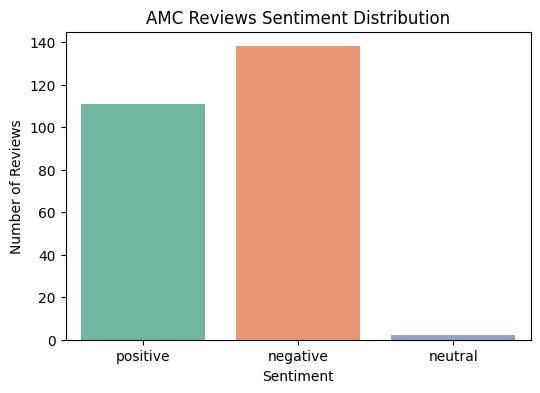

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(data=reviews_df, x='sentiment', palette='Set2')
plt.title("AMC Reviews Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()

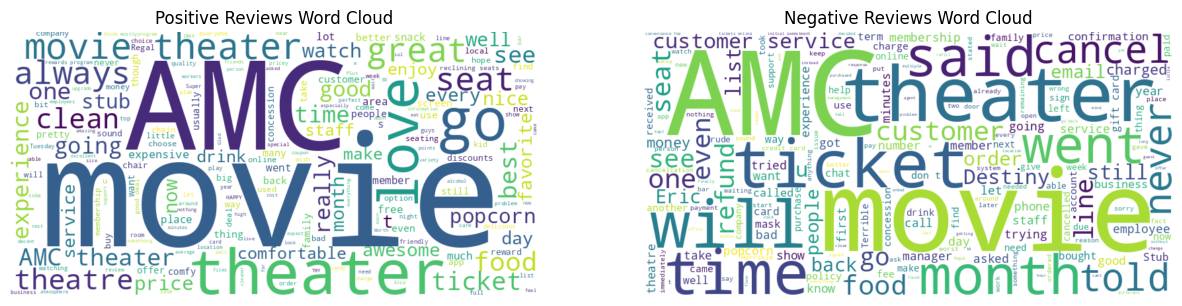

In [67]:
from wordcloud import WordCloud

# Positive reviews
positive_text = " ".join(reviews_df[reviews_df['sentiment']=='positive']['reviews'])
positive_wc = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Negative reviews
negative_text = " ".join(reviews_df[reviews_df['sentiment']=='negative']['reviews'])
negative_wc = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Plot
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.imshow(positive_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Reviews Word Cloud")

plt.subplot(1,2,2)
plt.imshow(negative_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Reviews Word Cloud")

plt.show()

In [68]:
import pandas as pd
from collections import Counter
from wordcloud import STOPWORDS

# -----------------------
# Stopwords + custom removals
# -----------------------
stopwords = set(STOPWORDS)
custom_remove = {'movie','amc','theater','will','want','us','still','one','go','movies','theatre','theaters'}
stopwords = stopwords.union(custom_remove)

# -----------------------
# Word mapping for merging similar words
# -----------------------
word_map = {
    'went': 'go',
    'going': 'go',
    'watch': 'see',
    'seeing': 'see',
}

# -----------------------
# Function to clean & map words
# -----------------------
def clean_words(text):
    words = text.lower().split()
    cleaned = []
    for w in words:
        if w.isalpha():
            # Map variations
            w = word_map.get(w, w)
            # Remove after mapping
            if w not in stopwords:
                cleaned.append(w)
    return cleaned

# -----------------------
# Positive words
# -----------------------
positive_text = " ".join(reviews_df[reviews_df['sentiment']=='positive']['reviews'])
positive_words = clean_words(positive_text)
positive_counts = Counter(positive_words)
top50_positive = positive_counts.most_common(50)

# -----------------------
# Negative words
# -----------------------
negative_text = " ".join(reviews_df[reviews_df['sentiment']=='negative']['reviews'])
negative_words = clean_words(negative_text)
negative_counts = Counter(negative_words)
top50_negative = negative_counts.most_common(50)

# -----------------------
# Combine into table
# -----------------------
top50_positive += [("",0)]*(50 - len(top50_positive))
top50_negative += [("",0)]*(50 - len(top50_negative))

df = pd.DataFrame({
    'Positive Word': [w for w,f in top50_positive],
    'Positive Freq': [f for w,f in top50_positive],
    'Negative Word': [w for w,f in top50_negative],
    'Negative Freq': [f for w,f in top50_negative]
})

df

,Positive Word,Positive Freq,Negative Word,Negative Freq
0,love,45,customer,46
1,always,34,tickets,44
2,see,33,said,44
3,great,31,even,43
4,seats,28,see,43
5,good,20,never,42
6,best,19,told,38
7,food,17,service,34
8,really,17,cancel,31
9,clean,13,time,31
